# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 4: Advanced Modelling

Author: Patrick Smith

Date: 12/04/2024

Contact: patrick.b.smith@gmail.com

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| General Region                 | Consolidated Region                                                        | object   |

## Data Loading

<div id='Load'></div>

In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [6]:
#see max columns
pd.options.display.max_columns = None

In [7]:
file_path = r'C:\Users\kamik\Downloads\model_df.csv'

df_model = pd.read_csv(file_path, low_memory=False)

Checking new df_model that we will model with

In [8]:
df_model.head()

,Year,Quarter,Nationality,Region,Age,Sex,Visa type group,Visa type,Visa type subgroup,Applications,Case outcome,Decisions,Grants,Occupation,Industry,Occ. major group,General_Region,Total Application and Decisions
0,2001,1,Afghanistan,Asia Central,Unknown,3,NaN,Visa Issued (Unknown Category),NaN,0.0,Issued,2652.0,2652.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,2652.0
1,2001,1,Afghanistan,Asia Central,Unknown,3,NaN,Humanitarian,NaN,0.0,Resettlement Case,809.0,809.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,809.0
2,2001,1,Afghanistan,Asia Central,Unknown,3,NaN,Refused,NaN,0.0,Asylum Case,15.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,15.0
3,2001,1,Afghanistan,Asia Central,Unknown,3,NaN,Refused,NaN,0.0,Asylum Case,88.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,88.0
4,2001,1,Afghanistan,Asia Central,Unknown,3,NaN,Refused,NaN,0.0,Asylum Case,609.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,609.0


Checking for duplicates

In [9]:
df_model.duplicated().sum()

134451

We've done enough imputations to see that the data is far enough. We can drop these and fix the remaining information

In [10]:
df_model = df_model.drop_duplicates()

print(f"We have {df_model.shape[0]} rows and {df_model.shape[1]} columns with string, floats and integers in our clean data.")

We have 1183718 rows and 18 columns with string, floats and integers in our clean data.


In [11]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183718 entries, 0 to 1318168
Data columns (total 18 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1183718 non-null  int64  
 1   Quarter                          1183718 non-null  int64  
 2   Nationality                      1180527 non-null  object 
 3   Region                           1180527 non-null  object 
 4   Age                              1183718 non-null  object 
 5   Sex                              1183718 non-null  int64  
 6   Visa type group                  540998 non-null   object 
 7   Visa type                        1145518 non-null  object 
 8   Visa type subgroup               729739 non-null   object 
 9   Applications                     1183718 non-null  float64
 10  Case outcome                     1183718 non-null  object 
 11  Decisions                        1183718 non-null  floa

Let's drop visa type group and visa type subgroup, don't need it anymore

In [12]:
df_model = df_model.drop(columns=['Visa type group', 'Visa type subgroup', 'Total Application and Decisions'])

Let's look at % of NAs

In [13]:
df_model.isna().sum()/df_model.shape[0]*100

Year                0.000000
Quarter             0.000000
Nationality         0.269574
Region              0.269574
Age                 0.000000
Sex                 0.000000
Visa type           3.227120
Applications        0.000000
Case outcome        0.000000
Decisions           0.000000
Grants              0.000000
Occupation          0.000000
Industry            0.000000
Occ. major group    0.000000
General_Region      0.269574
dtype: float64

OK, we're good for nulls. Let's check 0s

In [14]:
zero_percentage_numeric = (df_model == 0).sum() / df_model.shape[0] * 100
print(zero_percentage_numeric)

Year                 0.000000
Quarter              0.000000
Nationality          0.000000
Region               0.000000
Age                  0.000000
Sex                  0.000000
Visa type            0.000000
Applications        56.102974
Case outcome         0.000000
Decisions           15.970273
Grants              35.427695
Occupation           0.000000
Industry             0.000000
Occ. major group     0.000000
General_Region       0.000000
dtype: float64


Looking at unique now

In [15]:
df_model.nunique()

Year                  23
Quarter                4
Nationality          256
Region                17
Age                    7
Sex                    3
Visa type             15
Applications        5621
Case outcome           8
Decisions           7334
Grants              7095
Occupation           325
Industry              23
Occ. major group      12
General_Region         8
dtype: int64

OK we are fine to get rid of applications and grants they are the same. Our primary numerical column will be decisions

In [16]:
df_model = df_model.drop(columns=['Applications', 'Grants'])

Now we can fill the remaining nas with unknown. There is little left.

In [17]:
df_model.fillna('Unknown', inplace=True)

Making a df without nationality and occupation in case we need to. Unnecesary clutter. We're going to keep Occ. major group 

In [18]:
df_reduced = df_model.drop(['Nationality', 'Occupation', 'Industry', 'Region'], axis=1)

And another that includes nationality, but also dropping general region and region. 

In [19]:
df_reduced_nat = df_model.drop(['Occupation', 'Industry', 'General_Region', 'Region'], axis=1)

Checking both

In [20]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183718 entries, 0 to 1318168
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Year              1183718 non-null  int64  
 1   Quarter           1183718 non-null  int64  
 2   Nationality       1183718 non-null  object 
 3   Region            1183718 non-null  object 
 4   Age               1183718 non-null  object 
 5   Sex               1183718 non-null  int64  
 6   Visa type         1183718 non-null  object 
 7   Case outcome      1183718 non-null  object 
 8   Decisions         1183718 non-null  float64
 9   Occupation        1183718 non-null  object 
 10  Industry          1183718 non-null  object 
 11  Occ. major group  1183718 non-null  object 
 12  General_Region    1183718 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 126.4+ MB


In [21]:
df_reduced_nat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183718 entries, 0 to 1318168
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Year              1183718 non-null  int64  
 1   Quarter           1183718 non-null  int64  
 2   Nationality       1183718 non-null  object 
 3   Age               1183718 non-null  object 
 4   Sex               1183718 non-null  int64  
 5   Visa type         1183718 non-null  object 
 6   Case outcome      1183718 non-null  object 
 7   Decisions         1183718 non-null  float64
 8   Occ. major group  1183718 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 90.3+ MB


df_reduced is ~30% less of df_model. good to know for encoding purposes

Let's build a correlation matrix now

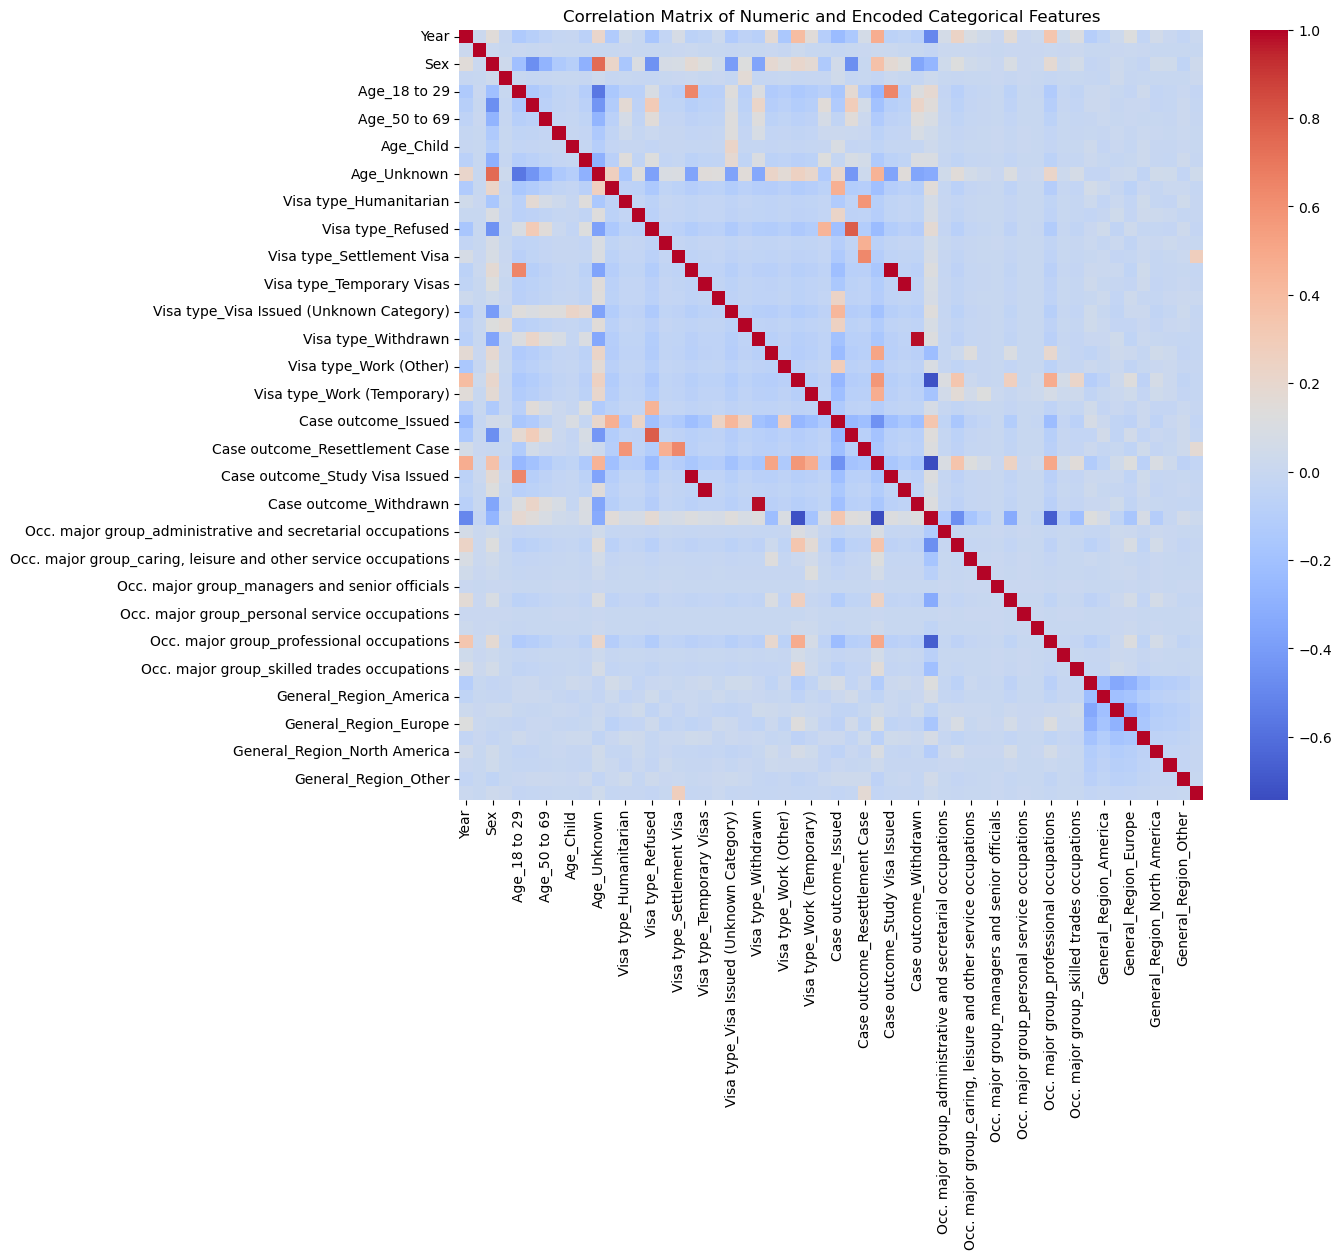

In [22]:
import matplotlib.pyplot as plt

# Automatically detect and one-hot encode all categorical (object-type) columns
categorical_cols = df_reduced.select_dtypes(include=['object']).columns
df_reduced = pd.get_dummies(df_reduced, columns=categorical_cols)

# Numeric columns, allowing for correlation calculation
corr_matrix = df_reduced.corr()

plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric and Encoded Categorical Features')
plt.show()


Let's also make a numeric_df to extract all the integers and floats

This is because many other rows are categorical and objects

Let's do the same for df_reduced_nat

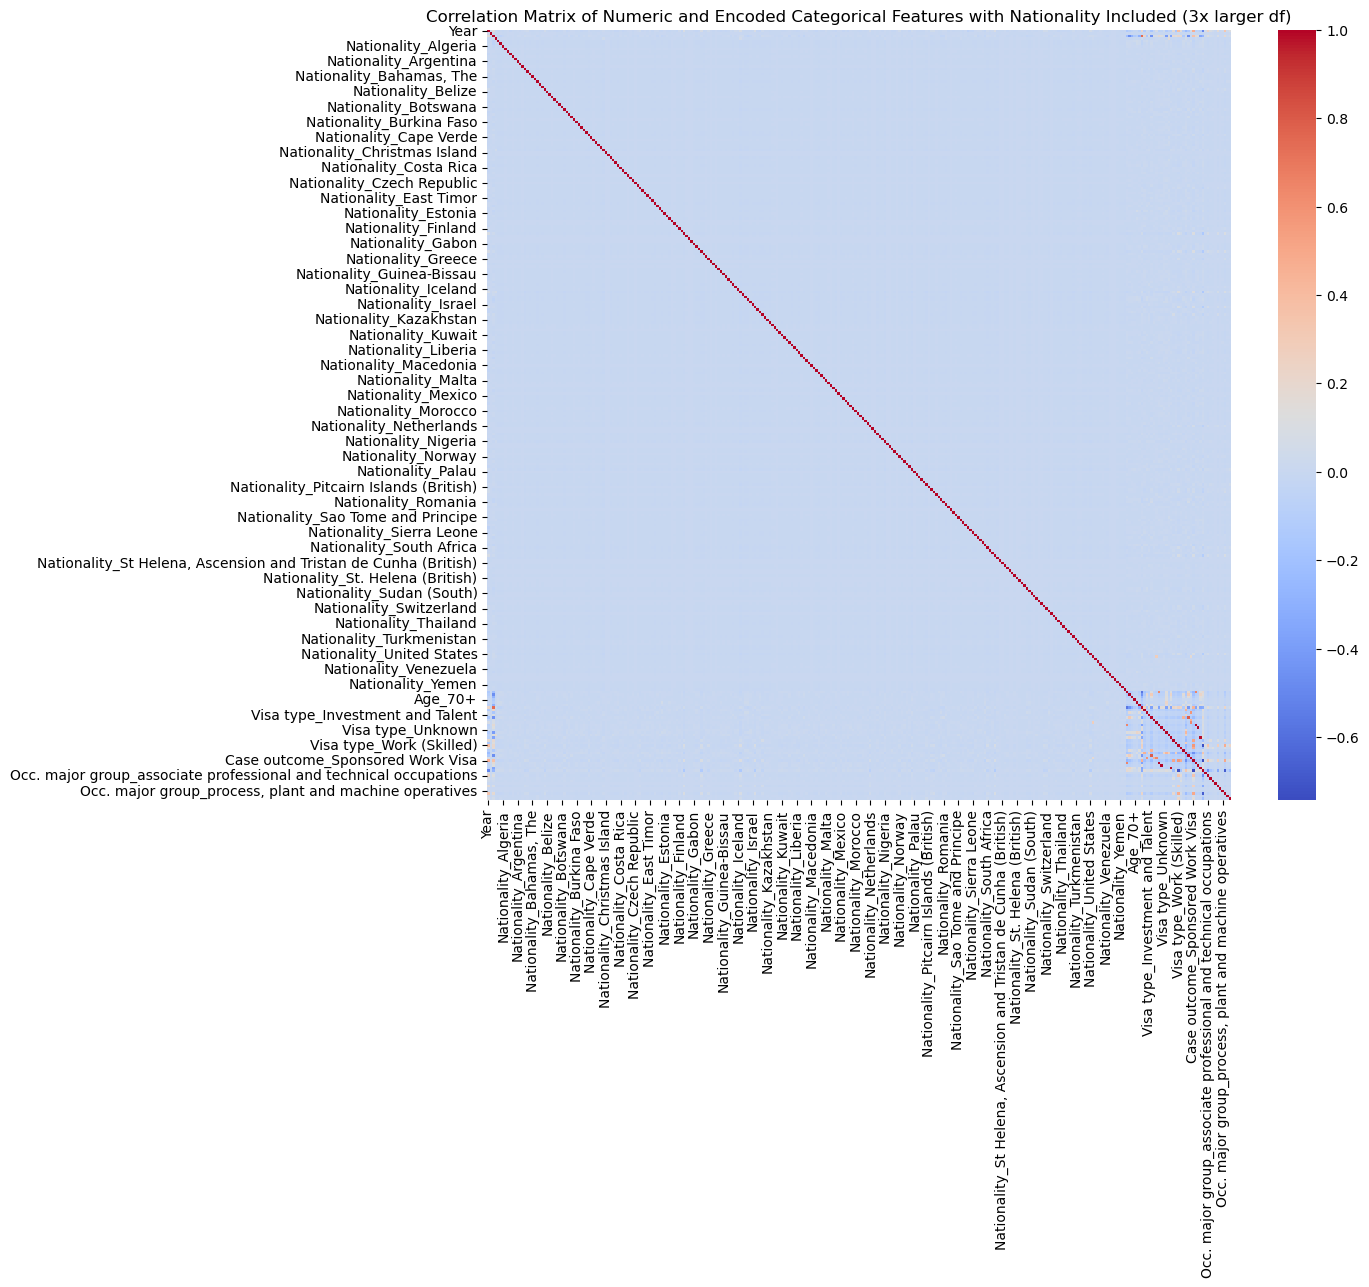

In [23]:
import matplotlib.pyplot as plt

# Automatically detect and one-hot encode all categorical (object-type) columns
categorical_cols = df_reduced_nat.select_dtypes(include=['object']).columns
df_reduced_nat = pd.get_dummies(df_reduced_nat, columns=categorical_cols)

# Numeric columns, allowing for correlation calculation
corr_matrix2 = df_reduced_nat.corr()

plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix2, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric and Encoded Categorical Features with Nationality Included (3x larger df)')
plt.show()


This is hard to read but we will test the dataframe anyway

In [24]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183718 entries, 0 to 1318168
Data columns (total 56 columns):
 #   Column                                                             Non-Null Count    Dtype  
---  ------                                                             --------------    -----  
 0   Year                                                               1183718 non-null  int64  
 1   Quarter                                                            1183718 non-null  int64  
 2   Sex                                                                1183718 non-null  int64  
 3   Decisions                                                          1183718 non-null  float64
 4   Age_18 to 29                                                       1183718 non-null  bool   
 5   Age_30 to 49                                                       1183718 non-null  bool   
 6   Age_50 to 69                                                       1183718 non-null  bool   
 7   Age_7

Now we will build our baseline logisitic regression model

In this code we are excluding all columns that start with 'Case outcome_Refused', where information from outside the training dataset is used to create the model. This ensures that the model does not have access to outcome-related information during training.

For data spilting, we have reserved 20% of the data reserved for testing

Then we train it as (X_train, y_train).

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#  Drop all 'Case outcome_' columns 
X = df_reduced.drop(columns=[col for col in df_reduced if col.startswith('Case outcome_')])
y = df_reduced['Case outcome_Refused']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the test
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.979205386408948

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.98      0.99    214708
        True       0.83      0.98      0.90     22036

    accuracy                           0.98    236744
   macro avg       0.91      0.98      0.94    236744
weighted avg       0.98      0.98      0.98    236744



93.72% of the predictions made by the model are correct. While this might seem high, it can be misleading in datasets

Accuracy is quite high, indicating that the model is very effective at predicting whether a case will be refused or not across the dataset

Precision indicates that when the model predicts a case as refused, it is correct ~83% of the time

Note that recall measures  how well the model can identify all the refused cases

F1-Score is a harmonic mean of precision and recall

The slightly lower precision for true suggests there are some false positives situations where cases are predicted as refused but are not actually refused

Let's do it again for the other larger dataframe, df_reduced_nat

In [27]:
#  Drop all 'Case outcome_' columns 
X = df_reduced_nat.drop(columns=[col for col in df_reduced_nat if col.startswith('Case outcome_')])
y = df_reduced_nat['Case outcome_Refused']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the test
y_pred = model.predict(X_test)

# Evaluatin
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9808442875004224

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.98      0.99    214708
        True       0.85      0.96      0.90     22036

    accuracy                           0.98    236744
   macro avg       0.92      0.97      0.95    236744
weighted avg       0.98      0.98      0.98    236744



This actually works better so we can use df_reduced_nat, unless we want the models to run faster in which case we can use df_reduced

continuing with df_reduced_nat because there's more variability. our targets are now Refused, study visa issued, and asylum case

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable: 1 for 'Refused' or 'Study Visa Issued', 0 otherwise
df_reduced_nat['Target'] = (df_reduced_nat['Case outcome_Refused'] | 
                            df_reduced_nat['Case outcome_Study Visa Issued'] | 
                            df_reduced_nat['Case outcome_Asylum Case']).astype(int)
# Target variable
y = df_reduced_nat['Target'].copy()

# Drop 'Case outcome_' related columns, including the new 'Target' column
X = df_reduced_nat.drop(columns=[col for col in df_reduced_nat if col.startswith('Case outcome_')] + ['Target'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Initialize a dictionary to store classification reports
classification_reports = {}

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Store the report using a descriptive key
classification_reports['Logistic Regression'] = report

# Print the accuracy and the classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9930980299395127

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    190959
           1       0.99      0.98      0.98     45785

    accuracy                           0.99    236744
   macro avg       0.99      0.99      0.99    236744
weighted avg       0.99      0.99      0.99    236744



Suggests maybe an imbalance

In [29]:
classification_reports['Logistic Regression']

{'0': {'precision': 0.9947422610368094,
  'recall': 0.996711335941223,
  'f1-score': 0.9957258250151715,
  'support': 190959},
 '1': {'precision': 0.9861695333318651,
  'recall': 0.9780277383422519,
  'f1-score': 0.9820817615580314,
  'support': 45785},
 'accuracy': 0.9930980299395127,
 'macro avg': {'precision': 0.9904558971843372,
  'recall': 0.9873695371417375,
  'f1-score': 0.9889037932866014,
  'support': 236744},
 'weighted avg': {'precision': 0.9930843421963282,
  'recall': 0.9930980299395127,
  'f1-score': 0.9930871374649688,
  'support': 236744}}

OK moving on to decision tree classifier

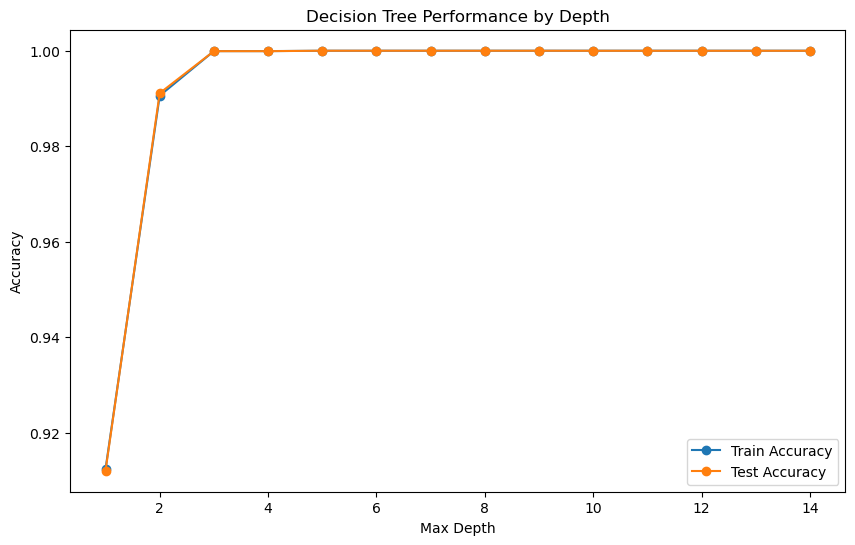


Classification Report for chosen depth (Depth 5):
               precision    recall  f1-score        support
0              0.999995  1.000000  0.999997  190959.000000
1              1.000000  0.999978  0.999989   45785.000000
accuracy       0.999996  0.999996  0.999996       0.999996
macro avg      0.999997  0.999989  0.999993  236744.000000
weighted avg   0.999996  0.999996  0.999996  236744.000000


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create the binary target variable
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store classification reports for each depth
classification_reports = {}

# Initialize lists to store accuracies for the non-scaled features
train_accs, test_accs = [], []

depth_values = range(1, 15)

# Step 4: Train and evaluate Decision Tree model over different depths
for d in depth_values:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_accs.append(dt.score(X_train, y_train))
    test_accs.append(dt.score(X_test, y_test))
    
    # Predicting the target variable for the testing set at current depth
    y_pred = dt.predict(X_test)
    
    # Evaluating the model and storing the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[f'Depth {d}'] = report

# Plotting the performance
plt.figure(figsize=(10, 6))

# Data Plot for Accuracy by Depth
plt.plot(depth_values, train_accs, label='Train Accuracy', marker='o')
plt.plot(depth_values, test_accs, label='Test Accuracy', marker='o')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance by Depth')

plt.show()

# Optional: Choose a depth based on the plots and print classification report
chosen_depth = 5  # Example, adjust based on observation
print("\nClassification Report for chosen depth (Depth 5):\n", pd.DataFrame(classification_reports[f'Depth {chosen_depth}']).transpose())

# Now, you can access and compare the stored reports for each depth from `classification_reports`


It's too perfect. Looks like we're overfitting. Let's try it again with df_reduced

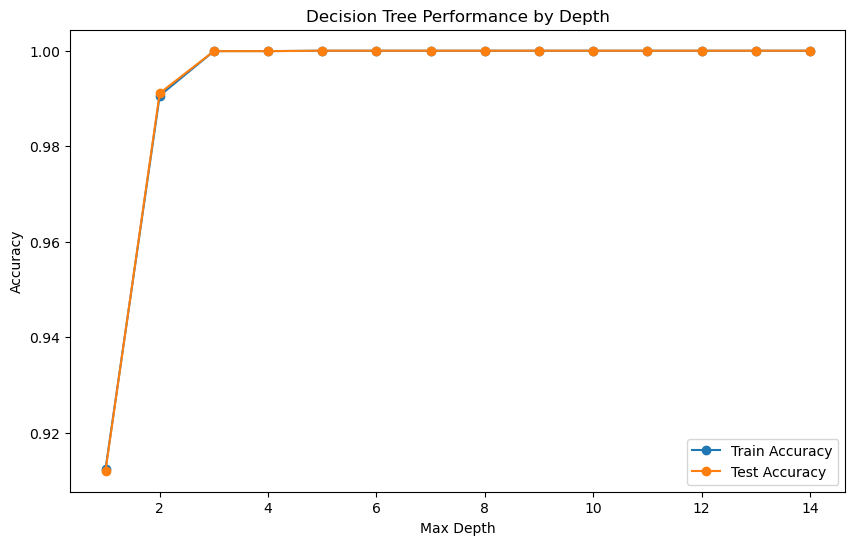


Classification Report for chosen depth (Depth 2):
               precision    recall  f1-score        support
0              0.989092  1.000000  0.994516  190959.000000
1              1.000000  0.954002  0.976460   45785.000000
accuracy       0.991104  0.991104  0.991104       0.991104
macro avg      0.994546  0.977001  0.985488  236744.000000
weighted avg   0.991201  0.991104  0.991024  236744.000000


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_reduced_nat is already defined and prepared

# Step 1: Create the binary target variable
df_reduced['Target'] = ((df_reduced['Case outcome_Refused'] | 
                             df_reduced['Case outcome_Study Visa Issued']) | 
                             df_reduced['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced[features]
y = df_reduced['Target']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store classification reports for each depth
classification_reports = {}

# Initialize lists to store accuracies for the non-scaled features
train_accs, test_accs = [], []

depth_values = range(1, 15)

# Step 4: Train and evaluate Decision Tree model over different depths
for d in depth_values:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_accs.append(dt.score(X_train, y_train))
    test_accs.append(dt.score(X_test, y_test))
    
    # Predicting the target variable for the testing set at current depth
    y_pred = dt.predict(X_test)
    
    # Evaluating the model and storing the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[f'Depth {d}'] = report

# Plotting the performance
plt.figure(figsize=(10, 6))

# Data Plot for Accuracy by Depth
plt.plot(depth_values, train_accs, label='Train Accuracy', marker='o')
plt.plot(depth_values, test_accs, label='Test Accuracy', marker='o')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance by Depth')

plt.show()


chosen_depth = 2  # Example, adjust based on observation
print("\nClassification Report for chosen depth (Depth 2):\n", pd.DataFrame(classification_reports[f'Depth {chosen_depth}']).transpose())

# Now, you can access and compare the stored reports for each depth from `classification_reports`


Same problem

OK now we're doing it with a pipeline

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming df_reduced_nat is already defined and loaded

# Define the binary target variable and the features as specified
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Initialize a dictionary to store classification reports
classification_reports = {}

# Define a dictionary of models if you're planning to evaluate multiple models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for model_name, model in models.items():
    # Create a pipeline that includes the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the report in the dictionary
    classification_reports[model_name] = report
    
    # Optionally, print the model's name and its accuracy
    print(f"Model: {model_name}, Accuracy: {accuracy}")

# At this point, you have all your reports stored in classification_reports
# You can access a specific report with classification_reports['Decision Tree']


Model: Decision Tree, Accuracy: 0.8169668502686446


This seems more reasonable. It appears the pipeline eliminated the overfitting

OK now let's compare logistic regression to decision tree with a pipeline

Model: Decision Tree, Accuracy: 0.8169668502686446
Model: Logistic Regression, Accuracy: 0.8053086878653736


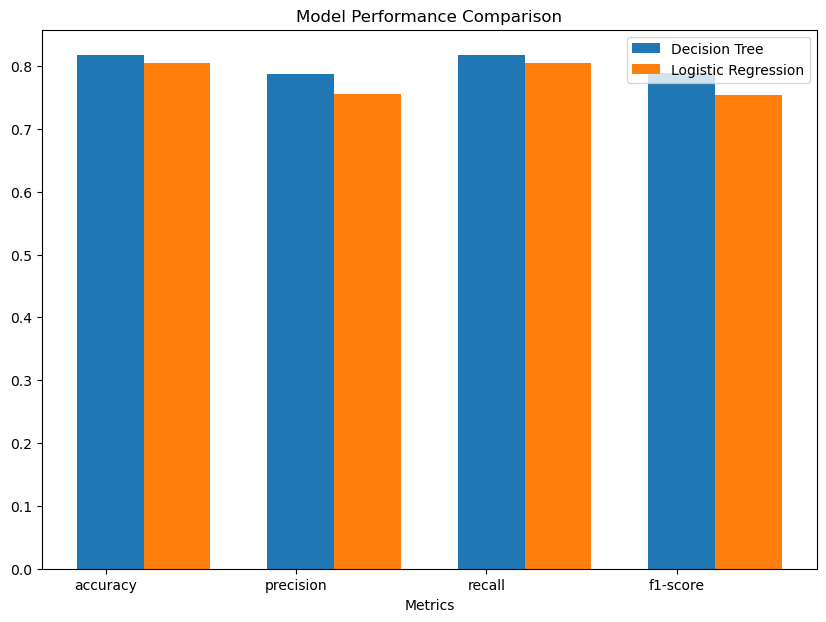


Classification Report for Decision Tree:
              precision    recall  f1-score        support
0              0.842941  0.950110  0.893322  190959.000000
1              0.557028  0.261658  0.356060   45785.000000
accuracy       0.816967  0.816967  0.816967       0.816967
macro avg      0.699984  0.605884  0.624691  236744.000000
weighted avg   0.787647  0.816967  0.789419  236744.000000

Classification Report for Logistic Regression:
              precision    recall  f1-score        support
0              0.820614  0.970858  0.889436  190959.000000
1              0.485817  0.114841  0.185769   45785.000000
accuracy       0.805309  0.805309  0.805309       0.805309
macro avg      0.653216  0.542849  0.537602  236744.000000
weighted avg   0.755866  0.805309  0.753350  236744.000000


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_reduced_nat is already prepared with features and target
# Set up your data splits, preprocessors, and other necessary setups

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Initialize metric containers
model_metrics = {}
classification_reports = {}  # To store all reports

for model_name, model in models.items():
    # Pipeline setup
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Ensure this is defined or replaced with suitable preprocessing
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[model_name] = report

    # Collect metrics for plotting
    model_metrics[model_name] = {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }

    print(f"Model: {model_name}, Accuracy: {accuracy}")

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 7))
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
indices = np.arange(len(metrics))
bar_width = 0.35

for i, (model_name, metrics_values) in enumerate(model_metrics.items()):
    values = [metrics_values[metric] for metric in metrics]
    ax.bar(indices + i * bar_width, values, width=bar_width, label=model_name)

ax.set_xlabel('Metrics')
ax.set_title('Model Performance Comparison')
ax.set_xticks(indices + bar_width / len(models) - 0.2)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

# Print and save classification reports
for model_name, report in classification_reports.items():
    print(f"\nClassification Report for {model_name}:")
    report_df = pd.DataFrame(report).transpose()
    print(report_df)
    # Optionally save the report to a CSV file
    report_df.to_csv(f"{model_name}_classification_report.csv")


Note that 1 is that one or more of these conditions (Refused, Study Visa Issued, or Asylum Case) are true for a record

0 represents the negative class, so none of the specified conditions are met for a given record, implying the case did not result in any of these 3 conditions

The recall for class 1 is low in both models, especially in Logistic Regression so  the models are failing to identify a significant portion of actual positive cases 

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the binary target variable and the features as specified
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features from the selected features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ])

# Define the pipeline with the DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__class_weight': [None, 'balanced']
}

# Initialize a dictionary to store classification reports
classification_reports = {}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best F1 weighted score
print("Best parameters found:", grid_search.best_params_)
print("Best F1 weighted score found:", grid_search.best_score_)

# Make predictions 
y_pred = grid_search.predict(X_test)

# Generate and store the classification report for the model found by
dt_gridsearchcv_report = classification_report(y_test, y_pred, output_dict=True)

classification_reports['Decision Tree GridSearchCV'] = dt_gridsearchcv_report

print("\nClassification Report for Decision Tree GridSearchCV:")
print(pd.DataFrame(classification_reports['Decision Tree GridSearchCV']).transpose())


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'classifier__class_weight': None, 'classifier__max_depth': 15, 'classifier__min_samples_split': 10}
Best F1 weighted score found: 0.7929537917462592

Classification Report for Decision Tree GridSearchCV:
              precision    recall  f1-score        support
0              0.845245  0.955456  0.896978  190959.000000
1              0.592742  0.270394  0.371376   45785.000000
accuracy       0.822969  0.822969  0.822969       0.822969
macro avg      0.718994  0.612925  0.634177  236744.000000
weighted avg   0.796413  0.822969  0.795330  236744.000000


This didn't work too well, the average is a bit lower than the others. Let's try with RandomizedSearchCV

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np

df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features from the selected features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline with the DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'classifier__max_depth': np.arange(3, 16),  # Reduced upper limit
    'classifier__min_samples_split': np.arange(2, 11),  # Narrower range
    'classifier__min_samples_leaf': np.arange(1, 10),  # Narrower range
    'classifier__class_weight': [None, 'balanced']
}

# Initialize a dictionary to store classification reports
classification_reports = {}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=30, cv=3, scoring='f1_weighted', verbose=1, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the best F1 weighted score
print("Best parameters found:", random_search.best_params_)
print("Best F1 weighted score found:", random_search.best_score_)

# Make predictions using the model found by RandomizedSearchCV
y_pred = random_search.predict(X_test)

# Generate and store the classification report for the model found by RandomizedSearchCV
dt_randomsearchcv_report = classification_report(y_test, y_pred, output_dict=True)
classification_reports['Decision Tree RandomizedSearchCV'] = dt_randomsearchcv_report

for model_name, report in classification_reports.items():
    print(f"\nClassification Report for {model_name}:")
    report_df = pd.DataFrame(report).transpose()
    print(report_df)
    # Save the report to a CSV file
    report_df.to_csv(f"{model_name}_classification_report.csv")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found: {'classifier__min_samples_split': 7, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 3, 'classifier__class_weight': 'balanced'}
Best F1 weighted score found: 0.8138295443391558

Classification Report for Decision Tree RandomizedSearchCV:
              precision    recall  f1-score        support
0              0.900894  0.854613  0.877143  190959.000000
1              0.500621  0.607885  0.549063   45785.000000
accuracy       0.806897  0.806897  0.806897       0.806897
macro avg      0.700757  0.731249  0.713103  236744.000000
weighted avg   0.823483  0.806897  0.813694  236744.000000


Looks to be on par with our best so far

Now let's try random forest

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
import pandas as pd
from tempfile import mkdtemp
from shutil import rmtree

df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

cachedir = mkdtemp()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
], memory=cachedir)

param_distributions = {
    'classifier__max_depth': [None, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__min_samples_split': [2, 5],
    'classifier__n_estimators': [50]
}

random_search_rf = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=5,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)

print("Best Parameters:", random_search_rf.best_params_)
print("Best CV Score:", random_search_rf.best_score_)

best_model_report_rf = classification_report(y_test, random_search_rf.predict(X_test), output_dict=True)
classification_reports = {'Random Forest with RandomizedSearchCV': best_model_report_rf}

rmtree(cachedir)

# Printing and saving the classification report for Random Forest with RandomizedSearchCV
for model_name, report in classification_reports.items():
    print(f"\nClassification Report for {model_name}:")
    report_df = pd.DataFrame(report).transpose()
    print(report_df)
    report_df.to_csv(f"{model_name}_classification_report.csv")  # Save the report to CSV


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 5}
Best CV Score: 0.8218335455883689

Classification Report for Random Forest with RandomizedSearchCV:
              precision    recall  f1-score       support
0              0.829734  0.982420  0.899645  190959.00000
1              0.684641  0.159179  0.258302   45785.00000
accuracy       0.823210  0.823210  0.823210       0.82321
macro avg      0.757187  0.570800  0.578973  236744.00000
weighted avg   0.801674  0.823210  0.775613  236744.00000


Still not the best

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Define the binary target variable and the features as specified
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluate the model
classification_report_xgb = classification_report(y_test, y_pred, output_dict=True)

# Store the classification report in the classification_reports dictionary
classification_reports = {}  # Ensure this dictionary is initialized before use
classification_reports['XGBoost'] = classification_report_xgb

# Optionally, print the classification report for XGBoost
print("\nClassification Report for XGBoost:")
print(pd.DataFrame(classification_reports['XGBoost']).transpose())

# Printing and saving the classification report for XGBoost
for model_name, report in classification_reports.items():
    print(f"\nClassification Report for {model_name}:")
    report_df = pd.DataFrame(report).transpose()
    print(report_df)
    report_df.to_csv(f"{model_name}_classification_report.csv")  # Save the report to CSV



Classification Report for XGBoost:
              precision    recall  f1-score        support
0              0.999995  1.000000  0.999997  190959.000000
1              1.000000  0.999978  0.999989   45785.000000
accuracy       0.999996  0.999996  0.999996       0.999996
macro avg      0.999997  0.999989  0.999993  236744.000000
weighted avg   0.999996  0.999996  0.999996  236744.000000

Classification Report for XGBoost:
              precision    recall  f1-score        support
0              0.999995  1.000000  0.999997  190959.000000
1              1.000000  0.999978  0.999989   45785.000000
accuracy       0.999996  0.999996  0.999996       0.999996
macro avg      0.999997  0.999989  0.999993  236744.000000
weighted avg   0.999996  0.999996  0.999996  236744.000000


Both are extremely high, indicating consistent performance across both classes

On the downside maybe there is some overfitting going on, in future iterations we can try other dataframes and model parametres

XGBoost involves building numerous decision trees and can capture complex nonlinear patterns, so this worked really well for our dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd

# Define X and y
X = df_reduced.drop('Target', axis=1)  
y = df_reduced['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setup the SVM model
model = SVC(random_state=42)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'C': [0.1, 1, 10],  # Reduced complexity of parameters
    'kernel': ['linear'],  # Using linear kernel for faster computation
    'gamma': ['scale']  # Simplifying the gamma parameter
}

# Setup RandomizedSearchCV to optimize hyperparameters
random_search_svm = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=5,  # Reduced number of iterations
    cv=3,  # Fewer cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model on scaled training data
random_search_svm.fit(X_train_scaled, y_train)

# Print the best parameters and the best cross-validation score
print("Best Parameters:", random_search_svm.best_params_)
print("Best CV Score:", random_search_svm.best_score_)

# Predict using the best model
y_pred = random_search_svm.predict(X_test_scaled)

# Generate and print the classification report
classification_report_svm = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:")
print(pd.DataFrame(classification_report_svm).transpose())

# Save the classification report to a CSV file
report_df = pd.DataFrame(classification_report_svm).transpose()
report_df.to_csv("SVM_Classification_Report.csv")


SVM didnt run for me... Waited for a long time. I'll try again another day.

We will map all of the ones we did buy reading the csvs that we downloaded

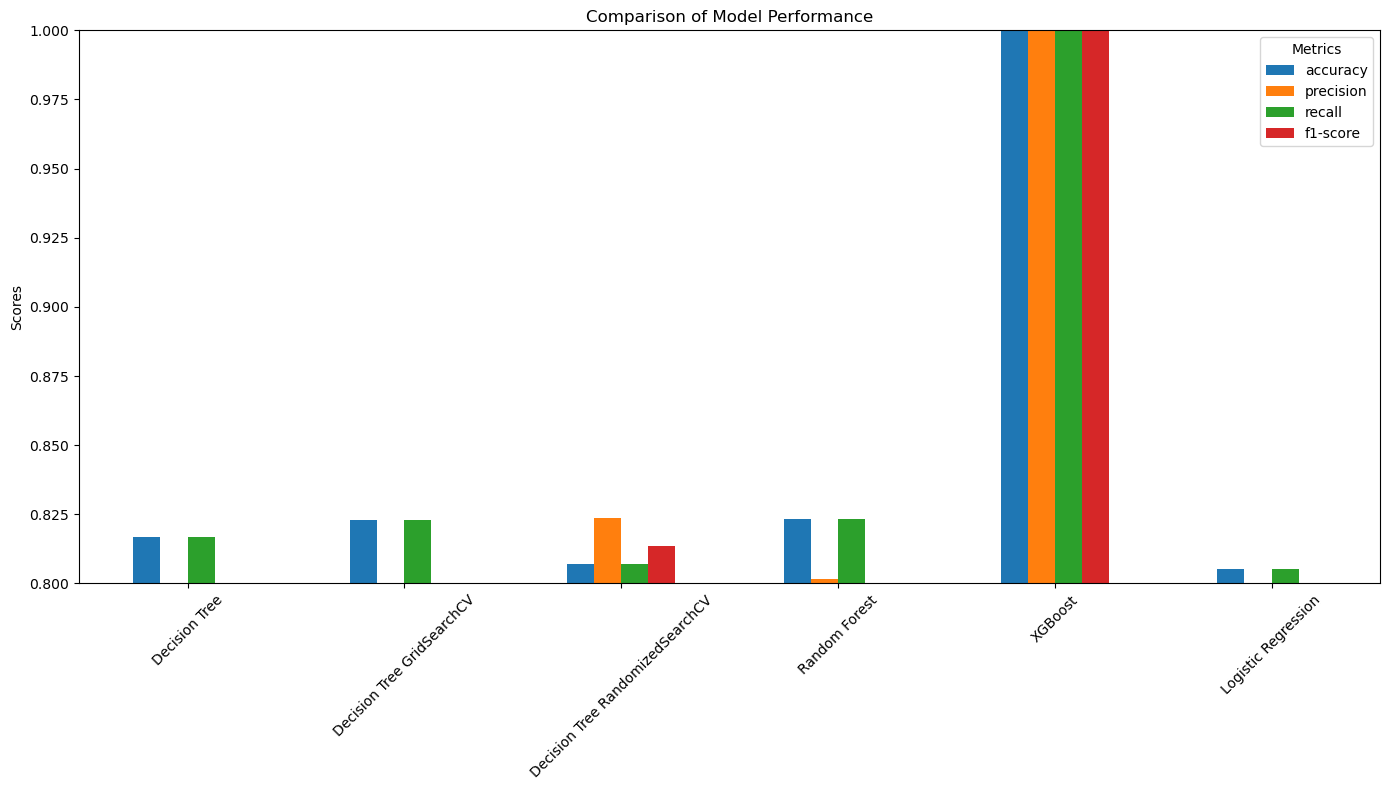

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the full path to your CSV files
files = {
    'Decision Tree': r'C:\Users\kamik\Downloads\Decision Tree_classification_report.csv',
    'Decision Tree GridSearchCV': r'C:\Users\kamik\Downloads\Decision Tree GridSearchCV_classification_report.csv',
    'Decision Tree RandomizedSearchCV': r'C:\Users\kamik\Downloads\Decision Tree RandomizedSearchCV_classification_report.csv',
    'Random Forest': r'C:\Users\kamik\Downloads\Random Forest with RandomizedSearchCV_classification_report.csv',
    'XGBoost': r'C:\Users\kamik\Downloads\XGBoost_classification_report.csv',
    'Logistic Regression': r'C:\Users\kamik\Downloads\Logistic Regression_classification_report.csv'
}

# Load the data
reports = {}
for model, filepath in files.items():
    reports[model] = pd.read_csv(filepath, index_col=0)

# Extract metrics - focusing on weighted averages or overall accuracy
metrics = {}
for model, report in reports.items():
    metrics[model] = {
        'accuracy': report.loc['accuracy', 'precision'],  # assuming accuracy is stored under 'precision' due to pandas pivot
        'precision': report.loc['weighted avg', 'precision'],
        'recall': report.loc['weighted avg', 'recall'],
        'f1-score': report.loc['weighted avg', 'f1-score']
    }

# Create a DataFrame from the extracted metrics
metrics_df = pd.DataFrame(metrics).T  # Transpose to have models as rows and metrics as columns

# Plotting
ax = metrics_df.plot(kind='bar', figsize=(14, 8), ylim=[0.8, 1.0])
ax.set_title('Comparison of Model Performance')
ax.set_ylabel('Scores')
ax.set_xticklabels(metrics_df.index, rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

#REF: ChatGPT

We can see that XGBoost is  by far the best!

To identify the best model, we looked at logistic regression, decision trees, random forests, SVM, and XGBoost, which are all applicable for classification. 

For optimization, we used techniques like GridSearchCV and RandomizedSearchCV to tune hyperparameters 

To prevent data leakage, the more advanced models used pipeline-based transformations

For choosing the best model, we have analyzed accuracy, precision, recall, and the F1-score as evaluation metrics


I experimented with multiple modeling approaches to capture different aspects:

Logistic Regression for baseline and binary classifications.
Decision Trees and Random Forests for  non-linear relationships and feature interactions
And XGBoost because its very good at varied data types and useful against overfitting due to its ensemble approach, which is great forcomplex and large datasets. Also, it includes regularization (L1 and L2), which controls over-fitting

And after all this, it was clear that XGBoost was the best, as its score was far better than everything else.

Thank you for reading my model and notes have an awesome summer!!! :)